In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
import plotly.express as px
from scipy.stats import entropy


In [41]:
conda install -c conda-forge umap-learn


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [43]:
from umap.umap_ import UMAP

In [3]:
path = r'C:\Users\jemcl\Desktop\College Notes\10. Spring 2023\CSCI 334\Final Project\Result.csv'
data = pd.read_csv(path)
data = data.replace(',','', regex=True)
data.iloc[:,4:10] = data.iloc[:,4:10].astype(float)
data

Unnamed: 0  FIPS Code State/Area  Year  Month  \
0               0          1    Alabama  1998    1.0   
1               1          1    Alabama  1998    2.0   
2               2          1    Alabama  1998    3.0   
3               3          1    Alabama  1998    4.0   
4               4          1    Alabama  1998    5.0   
...           ...        ...        ...   ...    ...   
15295       15295         56    Wyoming  2022    8.0   
15296       15296         56    Wyoming  2022    9.0   
15297       15297         56    Wyoming  2022   10.0   
15298       15298         56    Wyoming  2022   11.0   
15299       15299         56    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.

In [4]:
del data['FIPS Code']

In [5]:
newDat = data[data['State/Area'] == 'South Carolina']

In [6]:
newDat

Unnamed: 0      State/Area  Year  Month  \
480           480  South Carolina  1998    1.0   
481           481  South Carolina  1998    2.0   
482           482  South Carolina  1998    3.0   
483           483  South Carolina  1998    4.0   
484           484  South Carolina  1998    5.0   
...           ...             ...   ...    ...   
15175       15175  South Carolina  2022    8.0   
15176       15176  South Carolina  2022    9.0   
15177       15177  South Carolina  2022   10.0   
15178       15178  South Carolina  2022   11.0   
15179       15179  South Carolina  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
480                                            2924863.0           
481                                            2927841.0           
482                                            2931819.0           
483                                            2935797.0           
484                                            2939775.0           
...                                                  ...           
15175                                          4214924.0           
15176                                          4223242.0           
15177                                          4231566.0           
15178                                          4239410.0           
15179                                          4247118.0           

       Total Civilian Labor Force in State/Area  \
480                                   1919541.0   
481                                   1921953.0   
482                                   1925016.0   
483                                   1928531.0   
484                                   1932842.0   
...                                         ...   
15175                                 2374500.0   
15176                                 2372324.0   
15177                                 2371183.0   
15178                                 2371107.0   
15179                                 2371550.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
480                                      65.6                       1854351.0   
481                                      65.6                       1857603.0   
482                                      65.7                       1860558.0   
483                                      65.7                       1863316.0   
484                                      65.7                       1866196.0   
...                                       ...                             ...   
15175                                    56.3                       2296410.0   
15176                                    56.2                       2293917.0   
15177                                    56.0                       2293109.0   
15178                                    55.9                       2293650.0   
15179                                    55.8                       2294391.0   

       Percent (%) of Labor Force Employed in State/Area  \
480                                                 63.4   
481                                                 63.4   
482                                                 63.5   
483                                                 63.5   
484                                                 63.5   
...                                                  ...   
15175                                               54.5   
15176                                               54.3   
15177                                               54.2   
15178                                               54.1   
15179                                               54.0   

       Total Unemployment in State/Area  \
480                             65190.0   
481                             64350.0   
482                             64458.0   
483                             65215.0   
484                             66646.0   
...                     

In [7]:
newDat = ['Total Civilian Non-Institutional Population in State/Area', 'Percent (%) of Labor Force Unemployed in State/Area']
df = data.loc[:,newDat]
df.head()

Total Civilian Non-Institutional Population in State/Area  \
0                                          3328802.0           
1                                          3330604.0           
2                                          3333406.0           
3                                          3336208.0           
4                                          3339010.0           

   Percent (%) of Labor Force Unemployed in State/Area  
0                                                4.5    
1                                                4.4    
2                                                4.4    
3                                                4.4    
4                                                4.4

In [8]:
df['Total Civilian Non-Institutional Population in State/Area'] = df['Total Civilian Non-Institutional Population in State/Area'].astype(float)
df

Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Percent (%) of Labor Force Unemployed in State/Area  
0                                                    4.5    
1                                                    4.4    
2                                                    4.4    
3                                                    4.4    
4                                                    4.4    
...                                                  ...    
15295                                                3.7    
15296                                                3.8    
15297                                                3.9    
15298                                                3.9    
15299                                                3.9    

[15300 rows x 2 columns]

In [9]:
data[data.Year >= 1998]

Unnamed: 0 State/Area  Year  Month  \
0               0    Alabama  1998    1.0   
1               1    Alabama  1998    2.0   
2               2    Alabama  1998    3.0   
3               3    Alabama  1998    4.0   
4               4    Alabama  1998    5.0   
...           ...        ...   ...    ...   
15295       15295    Wyoming  2022    8.0   
15296       15296    Wyoming  2022    9.0   
15297       15297    Wyoming  2022   10.0   
15298       15298    Wyoming  2022   11.0   
15299       15299    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0  

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)

In [11]:
# indexing out numerical variables
df = data.iloc[:,4:14]
df

Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0   
15296                           11228.0   
15297                           11452.0   
15298                           11422.0   
15299                           11348.0   

       Percent (%) of Labor Force Unemployed in State/Area  \
0                                                    4.5     
1                                                    4.4     
2                                                    4.4     
3                                                    4.4     
4                                                    4.4

In [75]:
km.fit(df)

KMeans(n_clusters=4)

In [13]:
# predict the labels of clusters.
label = km.fit_predict(df)
 
print(label)
print(np.unique(label))

[1 1 1 ... 5 5 5]
[0 1 2 3 4 5]


In [14]:
label.shape, df.shape

((15300,), (15300, 10))

In [15]:
# lets take a check
df.iloc[label == 0, 0]

120      5797055.0
121      5807066.0
122      5816077.0
123      5826087.0
124      5836098.0
           ...    
15283    4744037.0
15284    4746776.0
15285    4749502.0
15286    4751701.0
15287    4753700.0
Name: Total Civilian Non-Institutional Population in State/Area, Length: 3478, dtype: float64

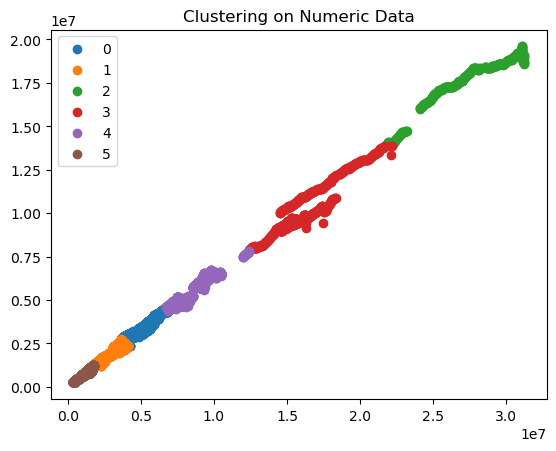

In [16]:
# getting unique labels
 
u_labels = np.unique(label)
#df['label'] = label
# plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.legend()
plt.title('Clustering on Numeric Data')
plt.show()

In [17]:
km.cluster_centers_

array([[5.00399902e+06, 3.33098317e+06, 6.67755249e+01, 3.15783452e+06,
        6.33057808e+01, 1.73148653e+05, 5.21535807e+00, 4.36184728e+04,
        2.49845487e+05, 3.26721373e+05],
       [2.80637804e+06, 1.78160327e+06, 6.38832171e+01, 1.68328838e+06,
        6.03805835e+01, 9.83148805e+04, 5.52205009e+00, 3.89185006e+04,
        1.27319210e+05, 1.60832342e+05],
       [2.76221738e+07, 1.76756341e+07, 6.41170088e+01, 1.64790428e+07,
        5.98190616e+01, 1.19659129e+06, 6.71173021e+00, 4.92823959e+04,
        1.55168816e+06, 2.11883671e+06],
       [1.61584786e+07, 1.01604404e+07, 6.28459880e+01, 9.58084349e+06,
        5.92633533e+01, 5.79596949e+05, 5.70778443e+00, 4.44356204e+04,
        8.20208687e+05, 1.10797207e+06],
       [8.66338173e+06, 5.55535075e+06, 6.41153974e+01, 5.20988822e+06,
        6.00983324e+01, 3.45462538e+05, 6.27176209e+00, 4.38035998e+04,
        4.29787485e+05, 5.56487255e+05],
       [9.05665942e+05, 5.95092232e+05, 6.66981709e+01, 5.66151578e+05,
   

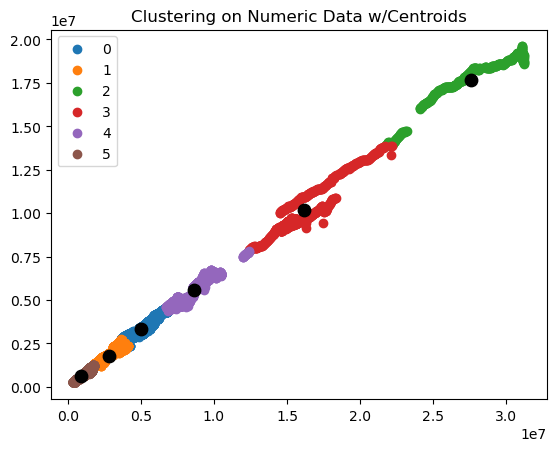

In [18]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on Numeric Data w/Centroids')
plt.show()

In [19]:
km.inertia_ ## what is this

2.326676543789444e+16

In [20]:
ks = [i for i in range(3,12)]
ks

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [21]:
inertias = []
for i in ks:
    km = KMeans(n_clusters=i)
    km.fit(df[df.columns[:11]])
    km.fit_predict(df[df.columns[:11]])
    inertias.append(km.inertia_)

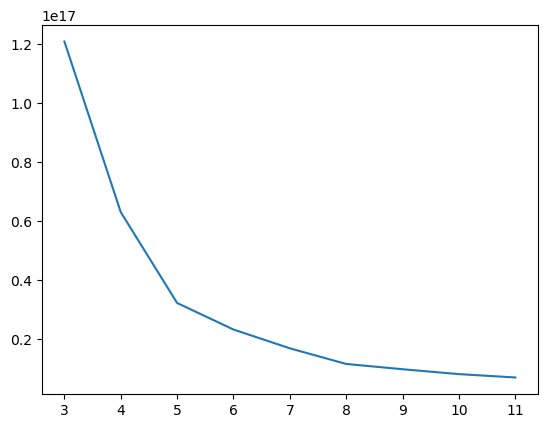

In [22]:
plt.plot(ks, inertias)

In [193]:
# data['Unemployment Category']
np.unique(label)

array([0, 1, 2, 3, 4])

[4 4 4 ... 1 1 1]
[0 1 2 3 4]


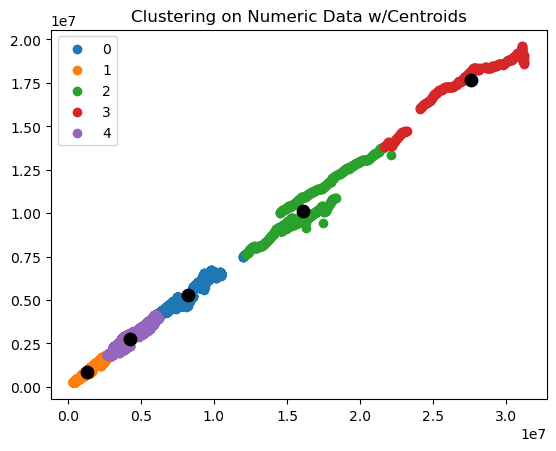

In [23]:
km = KMeans(n_clusters=5)
km.fit(df)

# predict the labels of clusters.
label = km.fit_predict(df)
 
print(label)
print(np.unique(label))
# getting unique labels
 
u_labels = np.unique(label)
#df['label'] = label
# plotting the results:


#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on Numeric Data w/Centroids')
plt.show()

In [24]:
labelDf = pd.DataFrame(label)
newDat = data.assign(Cluster = label)

In [25]:
a=1
b=2
c=4
d=0
e=3
print('Average Unemployment',newDat[newDat.Cluster==a]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==a]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==b]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==b]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==c]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==c]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==d]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==d]['State GDP'].mean())
print()
print('Average Unemployment',newDat[newDat.Cluster==e]['Percent (%) of Labor Force Unemployed in State/Area'].mean())
print('State GDP',newDat[newDat.Cluster==e]['State GDP'].mean())


Average Unemployment 4.991447178002877
State GDP 78502.9125904477

Average Unemployment 5.684341637010683
State GDP 1096901.3953736639

Average Unemployment 5.46514664523905
State GDP 266387.298654075

Average Unemployment 6.044539325842683
State GDP 529735.1233258384

Average Unemployment 6.703197674418605
State GDP 2116368.505813957


In [ ]:
# newDat[newDat.Cluster==1]['State/Area'].unique()
#newDat[newDat.Cluster==1]

In [118]:
#maxNum = df['Percent (%) of Labor Force Unemployed in State/Area'].max()
#minNum = df['Percent (%) of Labor Force Unemployed in State/Area'].min()
print(maxNum)
minNum

1.9

In [261]:
del data['Unemployment Category']

In [367]:
print((low + catRange*3))
print(minNum + (catRange*4))

6.4
7.1


In [262]:
# Construting categories for the 4 clusters
cats = []
high = 9
low = 2.5
numRange =  high - low
#print(numRange)
catRange = numRange/5

for x in range(df.shape[0]):
    unemp = df.loc[x,'Percent (%) of Labor Force Unemployed in State/Area']
    #print(unemp)
    if unemp <= (low + catRange):
        cats.append('Very Low Unemployment')
    elif (unemp > (low + catRange) and (unemp <= (low + (catRange*2))) ) :
        cats.append('Low Unemployment')
    elif (unemp > (low + (catRange*2)) and (unemp <= (low + (catRange*3))) ):
        cats.append('Average Unemployment')
    elif (unemp > (low + (catRange*3)) and (unemp <= (low + (catRange*4))) ):
        #print(x)
        cats.append('High Unemployment')
    else:
        #print(x)
        cats.append('Very High Unemployment')
        
data.insert(11,'Unemployment Category', cats)

In [370]:
data[data['Unemployment Category'] == 'Low Unemployment'].shape[0]

4657

In [264]:
data[data['State/Area']=='Wyoming']

Unnamed: 0 State/Area  Year  Month  \
600           600    Wyoming  1998    1.0   
601           601    Wyoming  1998    2.0   
602           602    Wyoming  1998    3.0   
603           603    Wyoming  1998    4.0   
604           604    Wyoming  1998    5.0   
...           ...        ...   ...    ...   
15295       15295    Wyoming  2022    8.0   
15296       15296    Wyoming  2022    9.0   
15297       15297    Wyoming  2022   10.0   
15298       15298    Wyoming  2022   11.0   
15299       15299    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
600                                             366083.0           
601                                             366105.0           
602                                             366126.0           
603                                             366148.0           
604                                             366169.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
600                                    257656.0   
601                                    258232.0   
602                                    258807.0   
603                                    259339.0   
604                                    259827.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
600                                      70.4                        245928.0   
601                                      70.5                        246331.0   
602                                      70.7                        246729.0   
603                                      70.8                        247102.0   
604                                      71.0                        247451.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
600                                                 67.2   
601                                                 67.3   
602                                                 67.4   
603                                                 67.5   
604                                                 67.6   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
600                             11728.0   
601                             11901.0   
602                             12078.0   
603                             12237.0   
604                             12376.0   
...                                 ...   
15295                           10840.0  

In [27]:
# running PCA and clustering on that
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = df
X = scaler.fit_transform(X)
pca = PCA(n_components=3)
#dfx_pca = pca.fit(X)
pca_result = pca.fit_transform(X)

In [28]:
pca_result

array([[-0.95716046,  0.21036146, -1.13821081],
       [-0.96138382,  0.2053779 , -1.11522916],
       [-0.96207378,  0.20533568, -1.11475383],
       ...,
       [-1.57506939,  0.43153792,  2.45937396],
       [-1.57507069,  0.43152656,  2.45939315],
       [-1.56919383,  0.45920244,  2.46476827]])

C:\Users\jemcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



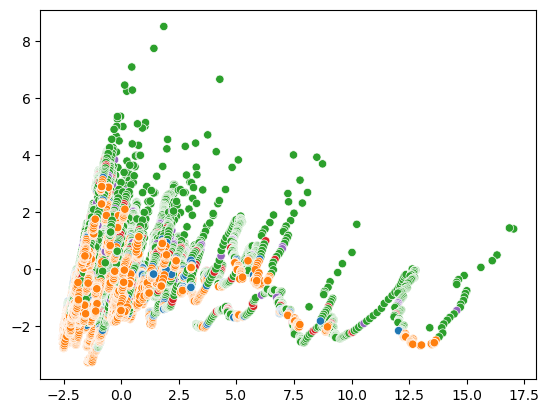

In [190]:
sns.scatterplot(pca_result[:, 0], pca_result[:, 1], hue=data['Unemployment Category']
                , legend=False)
plt.show()

In [266]:
fig = px.scatter_3d(
    pca_result, x=0, y=1, z=2,
    color=data['Unemployment Category']
, labels=data['Unemployment Category']

)
fig.update_traces(marker_size=8)
fig.show()

In [30]:
# Trying tSNE
tsne = TSNE(3)
tsne_result = tsne.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\jemcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


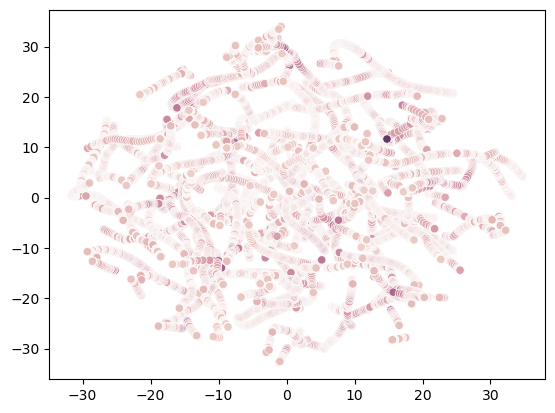

In [31]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue=data['Percent (%) of Labor Force Unemployed in State/Area'], legend=False)
plt.show()

In [32]:
tsne3 = TSNE(n_components=3, random_state=0)
tsne3 = tsne.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [33]:
tsne3

array([[ -4.603779 ,   6.66553  , -11.131324 ],
       [ -4.588656 ,   6.6729794, -11.151534 ],
       [ -4.5615587,   6.689996 , -11.185126 ],
       ...,
       [-32.00562  ,  -9.856807 ,   3.1025178],
       [-32.00503  ,  -9.864769 ,   3.096322 ],
       [-32.00446  ,  -9.87231  ,   3.0906024]], dtype=float32)

In [252]:
fig = px.scatter_3d(
    tsne3, x=0, y=1, z=2,
    color=data['Unemployment Category'], labels=data['Unemployment Category']
)
fig.update_traces(marker_size=8)
fig.show()

In [34]:
# plotting inertia
pca_df = pd.DataFrame(pca_result)
tsne_df = pd.DataFrame(tsne_result)


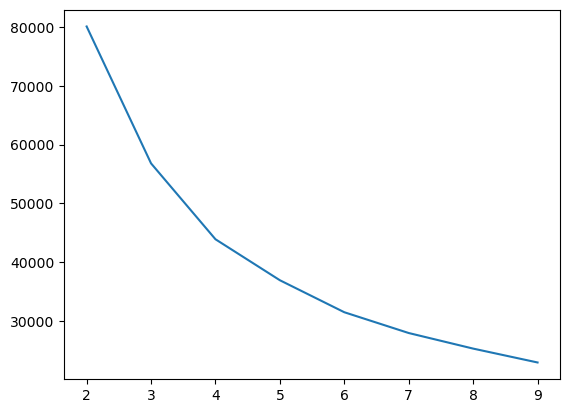

In [35]:
inertias = []
ks = [2,3,4,5,6,7,8,9]
for i in ks:
    km = KMeans(n_clusters=i)
    #km = KMeans(n_clusters=5)
    km.fit(pca_result)
    clusters = km.fit_predict(pca_result)
    #print('GOT HERE')
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias)

In [423]:
# K-Means on PCA and tSNE
# PCA K Means
km = KMeans(n_clusters=5)
km.fit(pca_result)
pclusters = km.fit_predict(pca_result)

pca_df['cluster'] = pclusters

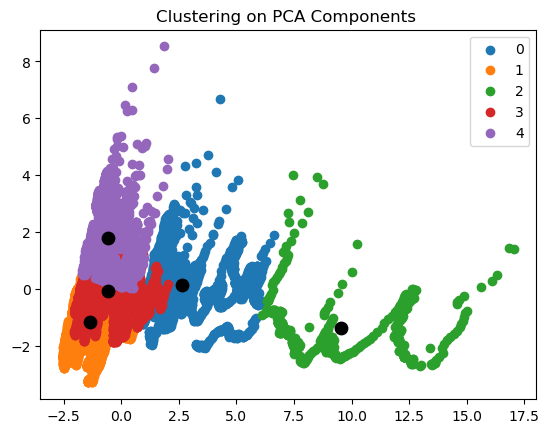

In [424]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(pclusters)


#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_df.iloc[pclusters == i , 0] , pca_df.iloc[pclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title('Clustering on PCA Components ')
plt.show()

In [287]:
u_labels

array([0, 1, 2, 3, 4])

In [457]:
# K Means on tSNE
km = KMeans(n_clusters=5)
km.fit(tsne_result)
tclusters = km.fit_predict(tsne_result)

tsne_df['cluster'] = tclusters

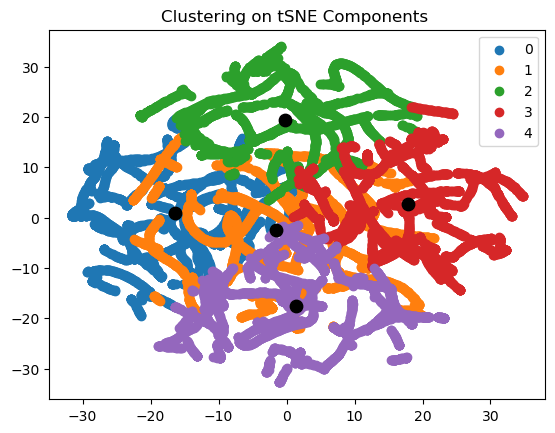

In [458]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(tclusters)

#plotting the results:
 
for i in u_labels:
    plt.scatter(tsne_df.iloc[tclusters == i , 0] , tsne_df.iloc[tclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('Clustering on tSNE Components ')
plt.legend()
plt.show()

In [44]:
# Moving on to UMAP
reducer = UMAP()

In [46]:
umap_result = reducer.fit_transform(df)

C:\Users\jemcl\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [459]:
km = KMeans(n_clusters=5)
km.fit(umap_result)
uclusters = km.fit_predict(umap_result)
umap_df = pd.DataFrame(umap_result)

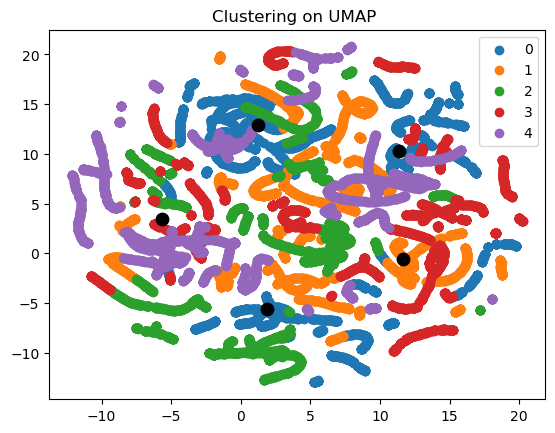

In [460]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(uclusters)

#plotting the results:
 
for i in u_labels:
    plt.scatter(umap_df.iloc[tclusters == i , 0] , umap_df.iloc[tclusters == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.title('Clustering on UMAP ')
plt.legend()
plt.show()

In [461]:
umap_df['cluster'] = uclusters

# Comparing Reduction Models

In [462]:
compare = data[['State/Area','Month','Year', 'Percent (%) of Labor Force Unemployed in State/Area', 'State GDP', 'Unemployment Category']]

In [463]:
compare['pca'] = pca_df['cluster']
compare['tsne'] = tsne_df['cluster']
compare['umap'] = umap_df['cluster']

C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jemcl\AppData\Local\Temp\ipykernel_9972\3313947952.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [464]:
data[data['State/Area']=='Wyoming']

Unnamed: 0 State/Area  Year  Month  \
600           600    Wyoming  1998    1.0   
601           601    Wyoming  1998    2.0   
602           602    Wyoming  1998    3.0   
603           603    Wyoming  1998    4.0   
604           604    Wyoming  1998    5.0   
...           ...        ...   ...    ...   
15295       15295    Wyoming  2022    8.0   
15296       15296    Wyoming  2022    9.0   
15297       15297    Wyoming  2022   10.0   
15298       15298    Wyoming  2022   11.0   
15299       15299    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
600                                             366083.0           
601                                             366105.0           
602                                             366126.0           
603                                             366148.0           
604                                             366169.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
600                                    257656.0   
601                                    258232.0   
602                                    258807.0   
603                                    259339.0   
604                                    259827.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
600                                      70.4                        245928.0   
601                                      70.5                        246331.0   
602                                      70.7                        246729.0   
603                                      70.8                        247102.0   
604                                      71.0                        247451.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
600                                                 67.2   
601                                                 67.3   
602                                                 67.4   
603                                                 67.5   
604                                                 67.6   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
600                             11728.0   
601                             11901.0   
602                             12078.0   
603                             12237.0   
604                             12376.0   
...                                 ...   
15295                           10840.0  

In [465]:
compare[compare['State/Area']=='Wyoming']

State/Area  Month  Year  \
600      Wyoming    1.0  1998   
601      Wyoming    2.0  1998   
602      Wyoming    3.0  1998   
603      Wyoming    4.0  1998   
604      Wyoming    5.0  1998   
...          ...    ...   ...   
15295    Wyoming    8.0  2022   
15296    Wyoming    9.0  2022   
15297    Wyoming   10.0  2022   
15298    Wyoming   11.0  2022   
15299    Wyoming   12.0  2022   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
600                                                  4.6      14840.2   
601                                                  4.6      14840.2   
602                                                  4.7      14840.2   
603                                                  4.7      14840.2   
604                                                  4.8      14840.2   
...                                                  ...          ...   
15295                                                3.7      47432.5   
15296                                                3.8      47432.5   
15297                                                3.9      47432.5   
15298                                                3.9      47432.5   
15299                                                3.9      47432.5   

       Unemployment Category  pca  tsne  umap  
600         Low Unemployment    1     0     2  
601         Low Unemployment    1     0     2  
602         Low Unemployment    1     0     2  
603         Low Unemployment    1     0     2  
604         Low Unemployment    1     0     2  
...                      ...  ...   ...   ...  
15295  Very Low Unemployment    3     0     2  
15296  Very Low Unemployment    3     0     2  
15297       Low Unemployment    3     0     2  
15298       Low Unemployment    3     0     2  
15299       Low Unemployment    3     0     2  

[300 rows x 9 columns]

In [466]:
compare[compare['State/Area']=='California']

State/Area  Month  Year  \
48     California    1.0  1998   
49     California    2.0  1998   
50     California    3.0  1998   
51     California    4.0  1998   
52     California    5.0  1998   
...           ...    ...   ...   
14743  California    8.0  2022   
14744  California    9.0  2022   
14745  California   10.0  2022   
14746  California   11.0  2022   
14747  California   12.0  2022   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
48                                                   6.0    1147520.4   
49                                                   6.0    1147520.4   
50                                                   6.0    1147520.4   
51                                                   6.0    1147520.4   
52                                                   5.9    1147520.4   
...                                                  ...          ...   
14743                                                3.8    3598102.7   
14744                                                4.0    3598102.7   
14745                                                4.1    3598102.7   
14746                                                4.1    3598102.7   
14747                                                4.1    3598102.7   

       Unemployment Category  pca  tsne  umap  
48      Average Unemployment    2     3     0  
49      Average Unemployment    2     3     0  
50      Average Unemployment    2     3     0  
51      Average Unemployment    2     3     0  
52      Average Unemployment    2     3     0  
...                      ...  ...   ...   ...  
14743  Very Low Unemployment    2     0     0  
14744       Low Unemployment    2     0     0  
14745       Low Unemployment    2     0     0  
14746       Low Unemployment    2     0     0  
14747       Low Unemployment    2     0     0  

[300 rows x 9 columns]

In [467]:
analysis = compare[compare['pca'] != compare['tsne']]

In [468]:
analysis

State/Area  Month  Year  \
0        Alabama    1.0  1998   
1        Alabama    2.0  1998   
2        Alabama    3.0  1998   
3        Alabama    4.0  1998   
4        Alabama    5.0  1998   
...          ...    ...   ...   
15295    Wyoming    8.0  2022   
15296    Wyoming    9.0  2022   
15297    Wyoming   10.0  2022   
15298    Wyoming   11.0  2022   
15299    Wyoming   12.0  2022   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
0                                                    4.5     110212.0   
1                                                    4.4     110212.0   
2                                                    4.4     110212.0   
3                                                    4.4     110212.0   
4                                                    4.4     110212.0   
...                                                  ...          ...   
15295                                                3.7      47432.5   
15296                                                3.8      47432.5   
15297                                                3.9      47432.5   
15298                                                3.9      47432.5   
15299                                                3.9      47432.5   

       Unemployment Category  pca  tsne  umap  
0           Low Unemployment    1     4     4  
1           Low Unemployment    1     4     4  
2           Low Unemployment    1     4     4  
3           Low Unemployment    1     4     4  
4           Low Unemployment    1     4     4  
...                      ...  ...   ...   ...  
15295  Very Low Unemployment    3     0     2  
15296  Very Low Unemployment    3     0     2  
15297       Low Unemployment    3     0     2  
15298       Low Unemployment    3     0     2  
15299       Low Unemployment    3     0     2  

[11645 rows x 9 columns]

In [275]:
compare.groupby(['tsne', 'pca']).size()

tsne  pca
0     0       324
      1       948
      2      2048
      3        36
1     0      1099
      1       603
      2      2429
      3        85
2     0      1283
      1      1434
      2       895
      3       249
3     0       334
      1      1768
      2      1450
      3       315
dtype: int64

In [276]:
compare.groupby('pca').count()

State/Area  Month  Year  \
pca                            
0          3040   3040  3040   
1          4753   4753  4753   
2          6822   6822  6822   
3           685    685   685   

     Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
pca                                                                   
0                                                 3040         3040   
1                                                 4753         4753   
2                                                 6822         6822   
3                                                  685          685   

     Unemployment Category  tsne  umap  
pca                                     
0                     3040  3040  3040  
1                     4753  4753  4753  
2                     6822  6822  6822  
3                      685   685   685

In [278]:
compare.groupby(['Unemployment Category', 'tsne']).size()

Unemployment Category   tsne
Average Unemployment    0        500
                        1        790
                        2        915
                        3        990
High Unemployment       0        342
                        1        422
                        2        564
                        3        441
Low Unemployment        0       1012
                        1       1245
                        2       1214
                        3       1186
Very High Unemployment  0        295
                        1        590
                        2        693
                        3        395
Very Low Unemployment   0       1207
                        1       1169
                        2        475
                        3        855
dtype: int64

In [279]:
compare.groupby(['pca', 'Unemployment Category']).count()

State/Area  Month  Year  \
pca Unemployment Category                             
0   Average Unemployment           760    760   760   
    High Unemployment              409    409   409   
    Low Unemployment              1004   1004  1004   
    Very High Unemployment         537    537   537   
    Very Low Unemployment          330    330   330   
1   Average Unemployment          1240   1240  1240   
    High Unemployment              856    856   856   
    Low Unemployment              1124   1124  1124   
    Very High Unemployment        1078   1078  1078   
    Very Low Unemployment          455    455   455   
2   Average Unemployment          1061   1061  1061   
    High Unemployment              417    417   417   
    Low Unemployment              2304   2304  2304   
    Very High Unemployment         170    170   170   
    Very Low Unemployment         2870   2870  2870   
3   Average Unemployment           134    134   134   
    High Unemployment               87     87    87   
    Low Unemployment               225    225   225   
    Very High Unemployment         188    188   188   
    Very Low Unemployment           51     51    51   

                            Percent (%) of Labor Force Unemployed in State/Area  \
pca Unemployment Category                                                         
0   Average Unemployment                                                  760     
    High Unemployment                                                     409     
    Low Unemployment                                                     1004     
    Very High Unemployment                                                537     
    Very Low Unemployment                                                 330     
1   Average Unemployment                                                 1240     
    High Unemployment                                                     856     
    Low Unemployment                                                     1124     
    Very High Unemployment                                               1078     
    Very Low Unemployment                                                 455     
2   Average Unemployment                                                 1061     
    High Unemployment                                                     417     
    Low Unemployment                                                     2304     
    Very High Unemployment                                                170     
    Very Low Unemployment                                                2870     
3   Average Unemployment                                                  134     
    High Unemployment                                                      87     
    Low Unemployment                                                      225     
    Very High Unemployment                                                188     
    Very Low Unemployment                                                  51     

                            State GDP  tsne  umap  
pca Unemployment Category                          
0   Average Unemployment          760   760   760  
    High Unemployment             409   409   409  
    Low Unemployment             1004  1004  1004  
    Very High Unemployment        537   537   537  
    Very Low Unemployment         330   330   330  
1   Average Unemployment         1240  1240  1240  
    High Unemployment             856   856   856  
    Low Unemployment             1124  1124  1124  
    Very High Unemployment       1078  1078  1078  
    Very Low Unemployment         455   455   455  
2   Average Unemployment         1061  1061  1061  
    High Unemployment             417   417   417  
    Low Unemployment             2304  2304  2304  
    Very High Unemployment        170   170   170  
    Very Low Unemployment        2870  2870  2870  
3   Average Unemployment          134   134   134  
    High Unemployment              87    87    87  
  

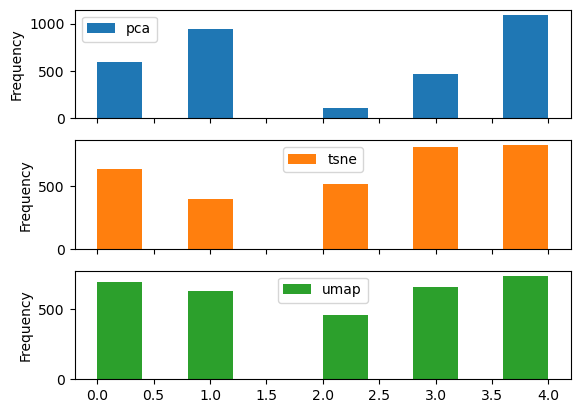

In [469]:
# Wrap in a function to get a sense of what might be best
compare[compare['Unemployment Category'] == 'Average Unemployment'][['pca', 'tsne', 'umap']].plot.hist(subplots=True)
plt.show()

In [283]:
compare[compare['Unemployment Category'] == 'Average Unemployment'].groupby('pca').size()

pca
0     760
1    1240
2    1061
3     134
dtype: int64

In [292]:
tsne_0 = compare[compare['tsne'] == 0]
tsne_0

State/Area  Month  Year  \
12        Alaska    1.0  1998   
13        Alaska    2.0  1998   
14        Alaska    3.0  1998   
15        Alaska    4.0  1998   
16        Alaska    5.0  1998   
...          ...    ...   ...   
15235    Vermont    8.0  2022   
15236    Vermont    9.0  2022   
15237    Vermont   10.0  2022   
15238    Vermont   11.0  2022   
15239    Vermont   12.0  2022   

       Percent (%) of Labor Force Unemployed in State/Area  State GDP  \
12                                                   6.3      24227.5   
13                                                   6.2      24227.5   
14                                                   6.2      24227.5   
15                                                   6.2      24227.5   
16                                                   6.3      24227.5   
...                                                  ...          ...   
15235                                                2.8      40617.1   
15236                                                3.0      40617.1   
15237                                                3.1      40617.1   
15238                                                3.1      40617.1   
15239                                                3.0      40617.1   

       Unemployment Category  pca  tsne  umap  
12      Average Unemployment    2     0     0  
13      Average Unemployment    2     0     0  
14      Average Unemployment    2     0     0  
15      Average Unemployment    2     0     0  
16      Average Unemployment    2     0     0  
...                      ...  ...   ...   ...  
15235  Very Low Unemployment    2     0     0  
15236  Very Low Unemployment    2     0     0  
15237  Very Low Unemployment    2     0     0  
15238  Very Low Unemployment    2     0     0  
15239  Very Low Unemployment    2     0     0  

[3356 rows x 9 columns]

In [293]:
tsne_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       500
High Unemployment          342
Low Unemployment          1012
Very High Unemployment     295
Very Low Unemployment     1207
dtype: int64

In [295]:
tsne0_proba = tsne_0.groupby('Unemployment Category').size() / len(tsne_0)
tsne0_proba

Unemployment Category
Average Unemployment      0.148987
High Unemployment         0.101907
Low Unemployment          0.301549
Very High Unemployment    0.087902
Very Low Unemployment     0.359654
dtype: float64

In [314]:
entropy(tsne0_proba, base=len(tsne0_proba))

0.9067810878082265

In [299]:
entropy(tsne0_proba)

1.4594078609967946

In [300]:
clean_compare = compare.dropna()

In [310]:
clean_compare.loc[:,'pca':'umap']

pca  tsne  umap
0        2     2     1
1        2     2     1
2        2     2     1
3        2     2     1
4        1     2     1
...    ...   ...   ...
15295    2     2     3
15296    2     2     3
15297    2     2     3
15298    2     2     3
15299    2     2     3

[15300 rows x 3 columns]

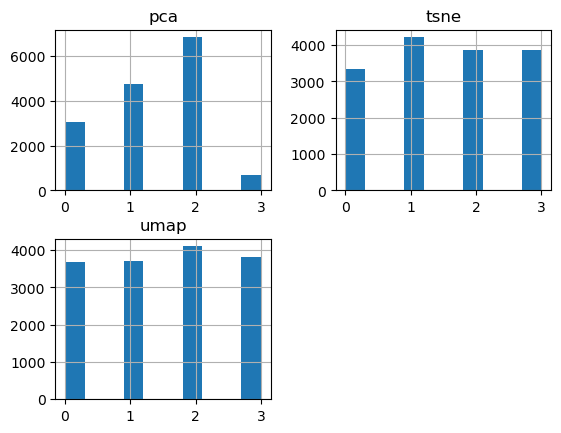

In [311]:
clean_compare.loc[:,'pca':'umap'].hist()
plt.show()

# Analyzing PCA Clusters

In [431]:
pca_0 = compare[compare['pca'] == 0]
pca_1 = compare[compare['pca'] == 1]
pca_2 = compare[compare['pca'] == 2]
pca_3 = compare[compare['pca'] == 3]
pca_4 = compare[compare['pca'] == 4]



In [432]:
# Cluster 0
pca_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      590
High Unemployment         318
Low Unemployment          791
Very High Unemployment    538
Very Low Unemployment     163
dtype: int64

In [433]:
pca0_proba = pca_0.groupby('Unemployment Category').size() / len(pca_0)
pca0_proba

Unemployment Category
Average Unemployment      0.245833
High Unemployment         0.132500
Low Unemployment          0.329583
Very High Unemployment    0.224167
Very Low Unemployment     0.067917
dtype: float64

In [434]:
entropy(pca0_proba)

1.496418800878656

In [435]:
# PCA Cluster 1
pca_1.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       941
High Unemployment          337
Low Unemployment          1918
Very High Unemployment     125
Very Low Unemployment     2013
dtype: int64

In [436]:
pca1_proba = pca_1.groupby('Unemployment Category').size() / len(pca_1)
pca1_proba

Unemployment Category
Average Unemployment      0.176415
High Unemployment         0.063180
Low Unemployment          0.359580
Very High Unemployment    0.023435
Very Low Unemployment     0.377390
dtype: float64

In [437]:
entropy(pca1_proba)

1.3040586464752395

In [438]:
pca_1.groupby('Unemployment Category').mean()['Percent (%) of Labor Force Unemployed in State/Area'].mean()

5.736340277045199

In [439]:
# Cluster 2
pca_2.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      108
High Unemployment          76
Low Unemployment          154
Very High Unemployment    134
Very Low Unemployment      29
dtype: int64

In [440]:
pca2_proba = pca_2.groupby('Unemployment Category').size() / len(pca_2)
pca2_proba

Unemployment Category
Average Unemployment      0.215569
High Unemployment         0.151697
Low Unemployment          0.307385
Very High Unemployment    0.267465
Very Low Unemployment     0.057884
dtype: float64

In [441]:
entropy(pca2_proba)

1.4971276191968297

In [442]:
pca_2.groupby('Unemployment Category').mean()['Percent (%) of Labor Force Unemployed in State/Area'].mean()

6.208603091776291

In [443]:
pca_3.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       464
High Unemployment          246
Low Unemployment          1066
Very High Unemployment     168
Very Low Unemployment     1369
dtype: int64

In [444]:
pca3_proba = pca_3.groupby('Unemployment Category').size() / len(pca_3)
pca3_proba

Unemployment Category
Average Unemployment      0.140054
High Unemployment         0.074253
Low Unemployment          0.321763
Very High Unemployment    0.050709
Very Low Unemployment     0.413221
dtype: float64

In [445]:
entropy(pca3_proba)

1.3496371970268293

In [350]:
pca_3.groupby('Unemployment Category').mean()['Percent (%) of Labor Force Unemployed in State/Area'].mean()

6.072416170825415

In [447]:
pca4_proba = pca_4.groupby('Unemployment Category').size() / len(pca_4)
pca4_proba

Unemployment Category
Average Unemployment      0.291045
High Unemployment         0.211087
Low Unemployment          0.194030
Very High Unemployment    0.268657
Very Low Unemployment     0.035181
dtype: float64

In [448]:
entropy(pca4_proba)

1.4765934790784407

In [449]:
# Average Entropy

print(( entropy(pca1_proba) + entropy(pca2_proba)
       + entropy(pca3_proba) + entropy(pca0_proba) + entropy(pca4_proba))/5 )

1.424767148531199


# Analyzing tSNE Clusters

In [477]:
tsne_0 = compare[compare['tsne'] == 0]
tsne_1 = compare[compare['tsne'] == 1]
tsne_2 = compare[compare['tsne'] == 2]
tsne_3 = compare[compare['tsne'] == 3]
tsne_4 = compare[compare['tsne'] == 4]


In [478]:
tsne_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       635
High Unemployment          326
Low Unemployment          1034
Very High Unemployment     440
Very Low Unemployment      855
dtype: int64

In [479]:
tsne0_proba = tsne_0.groupby('Unemployment Category').size() / len(tsne_0)
tsne0_proba

Unemployment Category
Average Unemployment      0.193009
High Unemployment         0.099088
Low Unemployment          0.314286
Very High Unemployment    0.133739
Very Low Unemployment     0.259878
dtype: float64

In [480]:
entropy(tsne0_proba)

1.5296022439583687

In [481]:
tsne_1.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       399
High Unemployment          248
Low Unemployment          1004
Very High Unemployment     273
Very Low Unemployment     1158
dtype: int64

In [482]:
tsne1_proba = tsne_1.groupby('Unemployment Category').size() / len(tsne_1)
tsne1_proba

Unemployment Category
Average Unemployment      0.129461
High Unemployment         0.080467
Low Unemployment          0.325762
Very High Unemployment    0.088579
Very Low Unemployment     0.375730
dtype: float64

In [483]:
entropy(tsne1_proba)

1.415307173555567

In [484]:
tsne_2.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      516
High Unemployment         349
Low Unemployment          811
Very High Unemployment    355
Very Low Unemployment     717
dtype: int64

In [485]:
tsne2_proba = tsne_2.groupby('Unemployment Category').size() / len(tsne_2)
tsne2_proba

Unemployment Category
Average Unemployment      0.187773
High Unemployment         0.127001
Low Unemployment          0.295124
Very High Unemployment    0.129185
Very Low Unemployment     0.260917
dtype: float64

In [486]:
entropy(tsne2_proba)

1.5512204376586762

In [487]:
tsne_3.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      817
High Unemployment         371
Low Unemployment          844
Very High Unemployment    323
Very Low Unemployment     656
dtype: int64

In [488]:
tsne3_proba = tsne_3.groupby('Unemployment Category').size() / len(tsne_3)
tsne3_proba

Unemployment Category
Average Unemployment      0.271338
High Unemployment         0.123215
Low Unemployment          0.280306
Very High Unemployment    0.107273
Very Low Unemployment     0.217868
dtype: float64

In [489]:
entropy(tsne3_proba)

1.539910627413913

In [475]:
tsne4_proba = tsne_4.groupby('Unemployment Category').size() / len(tsne_4)
tsne4_proba


Unemployment Category
Average Unemployment      0.261281
High Unemployment         0.149890
Low Unemployment          0.304197
Very High Unemployment    0.183654
Very Low Unemployment     0.100978
dtype: float64

In [476]:
entropy(tsne4_proba)

1.539935022996153

In [491]:
print(( entropy(tsne1_proba) + entropy(tsne2_proba)
       + entropy(tsne3_proba) + entropy(tsne0_proba) + entropy(tsne4_proba))/5 )

1.5151951011165354


# Analyzing UMAP Clusters

In [497]:
umap_0 = compare[compare['umap'] == 0]
umap_1 = compare[compare['umap'] == 1]
umap_2 = compare[compare['umap'] == 2]
umap_3 = compare[compare['umap'] == 3]
umap_4 = compare[compare['umap'] == 4]

In [498]:
umap_0.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       699
High Unemployment          361
Low Unemployment          1108
Very High Unemployment     472
Very Low Unemployment      598
dtype: int64

In [499]:
umap0_proba = umap_0.groupby('Unemployment Category').size() / len(umap_0)
umap0_proba

Unemployment Category
Average Unemployment      0.215874
High Unemployment         0.111489
Low Unemployment          0.342187
Very High Unemployment    0.145769
Very Low Unemployment     0.184682
dtype: float64

In [500]:
entropy(umap0_proba)

1.5351577948877124

In [501]:
umap_1.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      635
High Unemployment         399
Low Unemployment          816
Very High Unemployment    496
Very Low Unemployment     639
dtype: int64

In [502]:
umap1_proba = umap_1.groupby('Unemployment Category').size() / len(umap_1)
umap1_proba

Unemployment Category
Average Unemployment      0.212730
High Unemployment         0.133668
Low Unemployment          0.273367
Very High Unemployment    0.166164
Very Low Unemployment     0.214070
dtype: float64

In [503]:
entropy(umap1_proba)

1.5809897999340945

In [504]:
umap_2.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment       457
High Unemployment          194
Low Unemployment           889
Very High Unemployment     236
Very Low Unemployment     1002
dtype: int64

In [505]:
umap2_proba = umap_2.groupby('Unemployment Category').size() / len(umap_2)
umap2_proba

Unemployment Category
Average Unemployment      0.164507
High Unemployment         0.069834
Low Unemployment          0.320014
Very High Unemployment    0.084953
Very Low Unemployment     0.360691
dtype: float64

In [506]:
entropy(umap2_proba)

1.4246707101166858

In [507]:
umap_3.groupby('Unemployment Category').size()

Unemployment Category
Average Unemployment      663
High Unemployment         462
Low Unemployment          855
Very High Unemployment    367
Very Low Unemployment     857
dtype: int64

In [508]:
umap3_proba = umap_3.groupby('Unemployment Category').size() / len(umap_3)
umap3_proba

Unemployment Category
Average Unemployment      0.206929
High Unemployment         0.144195
Low Unemployment          0.266854
Very High Unemployment    0.114544
Very Low Unemployment     0.267478
dtype: float64

In [509]:
entropy(umap3_proba)

1.558688189402905

In [510]:
umap4_proba = umap_4.groupby('Unemployment Category').size() / len(umap_4)
umap4_proba

Unemployment Category
Average Unemployment      0.239418
High Unemployment         0.114055
Low Unemployment          0.319548
Very High Unemployment    0.129887
Very Low Unemployment     0.197092
dtype: float64

In [511]:
entropy(umap4_proba)

1.5396413806231712

In [520]:
print(( entropy(umap1_proba) + entropy(umap2_proba)
       + entropy(umap3_proba) + entropy(umap0_proba) + entropy(umap4_proba))/5 )

1.5278295749929138


In [ ]:
# PCA Clusters have lower entropy on average, so proceeding with those

# Analyzing PCA Clusters Further

In [513]:
# Check to see how much of each category is captured in each cluster

In [527]:
c0 = pca_0.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c0.sort_values(ascending=False)

Unemployment Category
Very High Unemployment    0.272681
Average Unemployment      0.184664
High Unemployment         0.179763
Low Unemployment          0.169852
Very Low Unemployment     0.043983
dtype: float64

In [529]:
c1 = pca_1.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c1.sort_values(ascending=False)

Unemployment Category
Very Low Unemployment     0.543173
Low Unemployment          0.411853
Average Unemployment      0.294523
High Unemployment         0.190503
Very High Unemployment    0.063355
dtype: float64

In [534]:
c2 = pca_2.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c2.sort_values(ascending=False)

Unemployment Category
Very High Unemployment    0.067917
High Unemployment         0.042962
Average Unemployment      0.033803
Low Unemployment          0.033068
Very Low Unemployment     0.007825
dtype: float64

In [533]:
c3 = pca_3.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c3.sort_values(ascending=False)

Unemployment Category
Very Low Unemployment     0.369401
Low Unemployment          0.228903
Average Unemployment      0.145227
High Unemployment         0.139062
Very High Unemployment    0.085150
dtype: float64

In [532]:
c4=pca_4.groupby('Unemployment Category').size() / data.groupby('Unemployment Category').size()
c4.sort_values(ascending=False)

Unemployment Category
Very High Unemployment    0.510897
High Unemployment         0.447711
Average Unemployment      0.341784
Low Unemployment          0.156324
Very Low Unemployment     0.035618
dtype: float64

In [597]:
t0=c0.to_frame(name='Cluster 0')
t1=c1.to_frame(name='Cluster 1')
t2=c2.to_frame(name='Cluster 2')
t3=c3.to_frame(name='Cluster 3')
t4=c4.to_frame(name='Cluster 4')
clusters = t0.merge(t1,on='Unemployment Category')
clusters = clusters.merge(t2,on='Unemployment Category')
clusters = clusters.merge(t3,on='Unemployment Category')
clusters = clusters.merge(t4,on='Unemployment Category')
clusters

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
Unemployment Category                                                        
Average Unemployment     0.184664   0.294523   0.033803   0.145227   0.341784
High Unemployment        0.179763   0.190503   0.042962   0.139062   0.447711
Low Unemployment         0.169852   0.411853   0.033068   0.228903   0.156324
Very High Unemployment   0.272681   0.063355   0.067917   0.085150   0.510897
Very Low Unemployment    0.043983   0.543173   0.007825   0.369401   0.035618

In [608]:
clusters.sort_values(by='Cluster 2',ascending=False)

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
Unemployment Category                                                        
Very High Unemployment   0.272681   0.063355   0.067917   0.085150   0.510897
High Unemployment        0.179763   0.190503   0.042962   0.139062   0.447711
Average Unemployment     0.184664   0.294523   0.033803   0.145227   0.341784
Low Unemployment         0.169852   0.411853   0.033068   0.228903   0.156324
Very Low Unemployment    0.043983   0.543173   0.007825   0.369401   0.035618

In [601]:
clusters.loc['Average Unemployment'].sort_values( ascending=False)

Cluster 4    0.341784
Cluster 1    0.294523
Cluster 0    0.184664
Cluster 3    0.145227
Cluster 2    0.033803
Name: Average Unemployment, dtype: float64

In [600]:
clusters.loc['High Unemployment'].sort_values( ascending=False)

Cluster 4    0.447711
Cluster 1    0.190503
Cluster 0    0.179763
Cluster 3    0.139062
Cluster 2    0.042962
Name: High Unemployment, dtype: float64

In [607]:
# These clusters capture most cases of Very High or High Unemployment
(clusters['Cluster 4'] + clusters['Cluster 0']).sort_values(ascending=False)

Unemployment Category
Very High Unemployment    0.783578
High Unemployment         0.627473
Average Unemployment      0.526448
Low Unemployment          0.326176
Very Low Unemployment     0.079601
dtype: float64

In [609]:
# Add Cluster 2 to capture more cases of Very High to Average Unemployment
(clusters['Cluster 4'] + clusters['Cluster 0'] + clusters['Cluster 2']).sort_values(ascending=False)

Unemployment Category
Very High Unemployment    0.851495
High Unemployment         0.670435
Average Unemployment      0.560250
Low Unemployment          0.359244
Very Low Unemployment     0.087426
dtype: float64

In [604]:
# These clusters capture most cases of Very Low or Low Unemployment
(clusters['Cluster 1'] + clusters['Cluster 3']).sort_values(ascending=False)

Unemployment Category
Very Low Unemployment     0.912574
Low Unemployment          0.640756
Average Unemployment      0.439750
High Unemployment         0.329565
Very High Unemployment    0.148505
dtype: float64

In [ ]:
# Analyzing the respective clusters should give us a good idea of what groups together Low & High Unemployment States

# Analyzing the Clusters

In [615]:
analysis = data
analysis['cluster'] = pca_df['cluster']

In [616]:
analysis

Unnamed: 0 State/Area  Year  Month  \
0               0    Alabama  1998    1.0   
1               1    Alabama  1998    2.0   
2               2    Alabama  1998    3.0   
3               3    Alabama  1998    4.0   
4               4    Alabama  1998    5.0   
...           ...        ...   ...    ...   
15295       15295    Wyoming  2022    8.0   
15296       15296    Wyoming  2022    9.0   
15297       15297    Wyoming  2022   10.0   
15298       15298    Wyoming  2022   11.0   
15299       15299    Wyoming  2022   12.0   

       Total Civilian Non-Institutional Population in State/Area  \
0                                              3328802.0           
1                                              3330604.0           
2                                              3333406.0           
3                                              3336208.0           
4                                              3339010.0           
...                                                  ...           
15295                                           458407.0           
15296                                           458904.0           
15297                                           459342.0           
15298                                           459752.0           
15299                                           460134.0           

       Total Civilian Labor Force in State/Area  \
0                                     2143042.0   
1                                     2143140.0   
2                                     2142936.0   
3                                     2142385.0   
4                                     2141884.0   
...                                         ...   
15295                                  293347.0   
15296                                  293412.0   
15297                                  293528.0   
15298                                  293573.0   
15299                                  293595.0   

       Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                        64.4                       2047388.0   
1                                        64.3                       2048758.0   
2                                        64.3                       2049134.0   
3                                        64.2                       2048713.0   
4                                        64.1                       2047919.0   
...                                       ...                             ...   
15295                                    64.0                        282507.0   
15296                                    63.9                        282184.0   
15297                                    63.9                        282076.0   
15298                                    63.9                        282151.0   
15299                                    63.8                        282247.0   

       Percent (%) of Labor Force Employed in State/Area  \
0                                                   61.5   
1                                                   61.5   
2                                                   61.5   
3                                                   61.4   
4                                                   61.3   
...                                                  ...   
15295                                               61.6   
15296                                               61.5   
15297                                               61.4   
15298                                               61.4   
15299                                               61.3   

       Total Unemployment in State/Area  \
0                               95654.0   
1                               94382.0   
2                               93802.0   
3                               93672.0   
4                               93965.0   
...                                 ...   
15295                           10840.0  

In [626]:
highUnemp = analysis[(analysis['cluster'] == 0) | (analysis['cluster'] == 4)]
lowUnemp = analysis[(analysis['cluster'] == 1) | (analysis['cluster'] == 3)]

In [643]:
# characteristics of low unemployment states
lowStates = lowUnemp['State/Area'].unique()
print('State GDP: ',lowUnemp['State GDP'].mean())
print('State Income per Capita: ',lowUnemp['State per Capita Income'].mean())
print('Unemployment Rate: ',lowUnemp['Percent (%) of Labor Force Unemployed in State/Area'].mean())

State GDP:  177193.21903550287
State Income per Capita:  43943.46837053313
Unemployment Rate:  4.455684052272436


In [642]:
# characteristics of high unemployment states
highStates = highUnemp['State/Area'].unique()
print('State GDP: ',highUnemp['State GDP'].mean())
print('State Income per Capita: ',highUnemp['State per Capita Income'].mean())
print('Unemployment Rate: ',highUnemp['Percent (%) of Labor Force Unemployed in State/Area'].mean())

State GDP:  356077.7620123566
State Income per Capita:  39383.330624187256
Unemployment Rate:  6.566758777633286


In [636]:
# low unemployment states not in high unemployment list
for state in lowStates:
    if state not in highStates:
        print(state)

Maryland
Nebraska
North Dakota
South Dakota
Wyoming


In [637]:
# high unemployment states not in low unemployment list
for state in highStates:
    if state not in lowStates:
        print(state)

Florida
Illinois
Mississippi
New Mexico
New York
Ohio
Pennsylvania
Texas
West Virginia


In [645]:
lowStates

array(['Alabama', 'Alaska', 'Arizona', 'Colorado', 'Connecticut',
       'Delaware', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa',
       'Kansas', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'North Carolina', 'North Dakota',
       'Oklahoma', 'Oregon', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'Wisconsin', 'Wyoming', 'District of Columbia',
       'Kentucky', 'Louisiana', 'Arkansas'], dtype=object)